In [18]:
! pip install timm

In [2]:
import timm
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

### Load CIFAR-10 dataset and create 5 splits (A/B)

In [293]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

image_datasets = {
    'train': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_a_1': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_a_1': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_b_1': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_b_1': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_a_2': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_a_2': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_b_2': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_b_2': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_a_3': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_a_3': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_b_3': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_b_3': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_a_4': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_a_4': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_b_4': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_b_4': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_a_5': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_a_5': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform),
    'train_b_5': torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    'val_b_5': torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_a_1': torch.utils.data.DataLoader(image_datasets['train_a_1'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_a_1': torch.utils.data.DataLoader(image_datasets['val_a_1'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_b_1': torch.utils.data.DataLoader(image_datasets['train_b_1'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_b_1': torch.utils.data.DataLoader(image_datasets['val_b_1'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_a_2': torch.utils.data.DataLoader(image_datasets['train_a_2'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_a_2': torch.utils.data.DataLoader(image_datasets['val_a_2'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_b_2': torch.utils.data.DataLoader(image_datasets['train_b_2'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_b_2': torch.utils.data.DataLoader(image_datasets['val_b_2'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_a_3': torch.utils.data.DataLoader(image_datasets['train_a_3'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_a_3': torch.utils.data.DataLoader(image_datasets['val_a_3'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_b_3': torch.utils.data.DataLoader(image_datasets['train_b_3'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_b_3': torch.utils.data.DataLoader(image_datasets['val_b_3'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_a_4': torch.utils.data.DataLoader(image_datasets['train_a_4'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_a_4': torch.utils.data.DataLoader(image_datasets['val_a_4'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_b_4': torch.utils.data.DataLoader(image_datasets['train_b_4'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_b_4': torch.utils.data.DataLoader(image_datasets['val_b_4'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_a_5': torch.utils.data.DataLoader(image_datasets['train_a_5'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_a_5': torch.utils.data.DataLoader(image_datasets['val_a_5'], batch_size=batch_size, shuffle=False, num_workers=2),
    'train_b_5': torch.utils.data.DataLoader(image_datasets['train_b_5'], batch_size=batch_size, shuffle=True, num_workers=2),
    'val_b_5': torch.utils.data.DataLoader(image_datasets['val_b_5'], batch_size=batch_size, shuffle=False, num_workers=2)
  }

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [294]:
train_targets_array = np.array(image_datasets['train'].targets)
val_targets_array = np.array(image_datasets['val'].targets)

In [295]:
idx_a_1 = ((train_targets_array==0) | (train_targets_array==1) | (train_targets_array==2) | (train_targets_array==3) | (train_targets_array==4))
idx_b_1 = ((train_targets_array==5) | (train_targets_array==6) | (train_targets_array==7) | (train_targets_array==8) | (train_targets_array==9))

image_datasets['train_a_1'].targets = list(np.array(image_datasets['train'].targets)[idx_a_1])
image_datasets['train_a_1'].data = image_datasets['train'].data[idx_a_1]

image_datasets['train_b_1'].targets = list(np.array(image_datasets['train'].targets)[idx_b_1])
image_datasets['train_b_1'].data = image_datasets['train'].data[idx_b_1]

In [296]:
idx_a_1 = ((val_targets_array==0) | (val_targets_array==1) | (val_targets_array==2) | (val_targets_array==3) | (val_targets_array==4))
idx_b_1 = ((val_targets_array==5) | (val_targets_array==6) | (val_targets_array==7) | (val_targets_array==8) | (val_targets_array==9))

image_datasets['val_a_1'].targets = list(np.array(image_datasets['val'].targets)[idx_a_1])
image_datasets['val_a_1'].data = image_datasets['val'].data[idx_a_1]

image_datasets['val_b_1'].targets = list(np.array(image_datasets['val'].targets)[idx_b_1])
image_datasets['val_b_1'].data = image_datasets['val'].data[idx_b_1]

In [297]:
idx_a_2 = ((train_targets_array==0) | (train_targets_array==2) | (train_targets_array==4) | (train_targets_array==6) | (train_targets_array==8))
idx_b_2 = ((train_targets_array==1) | (train_targets_array==3) | (train_targets_array==5) | (train_targets_array==7) | (train_targets_array==9))

image_datasets['train_a_2'].targets = list(np.array(image_datasets['train'].targets)[idx_a_2])
image_datasets['train_a_2'].data = image_datasets['train'].data[idx_a_2]

image_datasets['train_b_2'].targets = list(np.array(image_datasets['train'].targets)[idx_b_2])
image_datasets['train_b_2'].data = image_datasets['train'].data[idx_b_2]

In [298]:
idx_a_2 = ((val_targets_array==0) | (val_targets_array==2) | (val_targets_array==4) | (val_targets_array==6) | (val_targets_array==8))
idx_b_2 = ((val_targets_array==1) | (val_targets_array==3) | (val_targets_array==5) | (val_targets_array==7) | (val_targets_array==9))

image_datasets['val_a_2'].targets = list(np.array(image_datasets['val'].targets)[idx_a_2])
image_datasets['val_a_2'].data = image_datasets['val'].data[idx_a_2]

image_datasets['val_b_2'].targets = list(np.array(image_datasets['val'].targets)[idx_b_2])
image_datasets['val_b_2'].data = image_datasets['val'].data[idx_b_2]

In [299]:
idx_a_3 = ((train_targets_array==0) | (train_targets_array==1) | (train_targets_array==2) | (train_targets_array==8) | (train_targets_array==9))
idx_b_3 = ((train_targets_array==3) | (train_targets_array==4) | (train_targets_array==5) | (train_targets_array==6) | (train_targets_array==7))

image_datasets['train_a_3'].targets = list(np.array(image_datasets['train'].targets)[idx_a_3])
image_datasets['train_a_3'].data = image_datasets['train'].data[idx_a_3]

image_datasets['train_b_3'].targets = list(np.array(image_datasets['train'].targets)[idx_b_3])
image_datasets['train_b_3'].data = image_datasets['train'].data[idx_b_3]

In [300]:
idx_a_3 = ((val_targets_array==0) | (val_targets_array==1) | (val_targets_array==2) | (val_targets_array==8) | (val_targets_array==9))
idx_b_3 = ((val_targets_array==3) | (val_targets_array==4) | (val_targets_array==5) | (val_targets_array==6) | (val_targets_array==7))

image_datasets['val_a_3'].targets = list(np.array(image_datasets['val'].targets)[idx_a_3])
image_datasets['val_a_3'].data = image_datasets['val'].data[idx_a_3]

image_datasets['val_b_3'].targets = list(np.array(image_datasets['val'].targets)[idx_b_3])
image_datasets['val_b_3'].data = image_datasets['val'].data[idx_b_3]

In [301]:
idx_a_4 = ((train_targets_array==0) | (train_targets_array==3) | (train_targets_array==6) | (train_targets_array==9) | (train_targets_array==1))
idx_b_4 = ((train_targets_array==2) | (train_targets_array==4) | (train_targets_array==5) | (train_targets_array==7) | (train_targets_array==8))

image_datasets['train_a_4'].targets = list(np.array(image_datasets['train'].targets)[idx_a_4])
image_datasets['train_a_4'].data = image_datasets['train'].data[idx_a_4]

image_datasets['train_b_4'].targets = list(np.array(image_datasets['train'].targets)[idx_b_4])
image_datasets['train_b_4'].data = image_datasets['train'].data[idx_b_4]

In [302]:
idx_a_4 = ((val_targets_array==0) | (val_targets_array==3) | (val_targets_array==6) | (val_targets_array==9) | (val_targets_array==1))
idx_b_4 = ((val_targets_array==2) | (val_targets_array==4) | (val_targets_array==5) | (val_targets_array==7) | (val_targets_array==8))

image_datasets['val_a_4'].targets = list(np.array(image_datasets['val'].targets)[idx_a_4])
image_datasets['val_a_4'].data = image_datasets['val'].data[idx_a_4]

image_datasets['val_b_4'].targets = list(np.array(image_datasets['val'].targets)[idx_b_4])
image_datasets['val_b_4'].data = image_datasets['val'].data[idx_b_4]

In [303]:
idx_a_5 = ((train_targets_array==1) | (train_targets_array==5) | (train_targets_array==9) | (train_targets_array==2) | (train_targets_array==7))
idx_b_5 = ((train_targets_array==0) | (train_targets_array==3) | (train_targets_array==4) | (train_targets_array==6) | (train_targets_array==8))

image_datasets['train_a_5'].targets = list(np.array(image_datasets['train'].targets)[idx_a_5])
image_datasets['train_a_5'].data = image_datasets['train'].data[idx_a_5]

image_datasets['train_b_5'].targets = list(np.array(image_datasets['train'].targets)[idx_b_5])
image_datasets['train_b_5'].data = image_datasets['train'].data[idx_b_5]

In [304]:
idx_a_5 = ((val_targets_array==1) | (val_targets_array==5) | (val_targets_array==9) | (val_targets_array==2) | (val_targets_array==7))
idx_b_5 = ((val_targets_array==0) | (val_targets_array==3) | (val_targets_array==4) | (val_targets_array==6) | (val_targets_array==8))

image_datasets['val_a_5'].targets = list(np.array(image_datasets['val'].targets)[idx_a_5])
image_datasets['val_a_5'].data = image_datasets['val'].data[idx_a_5]

image_datasets['val_b_5'].targets = list(np.array(image_datasets['val'].targets)[idx_b_5])
image_datasets['val_b_5'].data = image_datasets['val'].data[idx_b_5]

In [305]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'train_a_1', 'val_a_1', 'train_b_1', 'val_b_1', 'train_a_2', 'val_a_2', 'train_b_2', 'val_b_2', 'train_a_3', 'val_a_3', 'train_b_3', 'val_b_3', 'train_a_4', 'val_a_4', 'train_b_4', 'val_b_4', 'train_a_5', 'val_a_5', 'train_b_5', 'val_b_5']}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

classes_a_1 = ('plane', 'car', 'bird', 'cat', 'deer')
classes_b_1 = ('dog', 'frog', 'horse', 'ship', 'truck')

classes_a_2 = ('plane', 'bird', 'deer', 'frog', 'ship')
classes_b_2 = ('car', 'cat', 'dog', 'horse', 'truck')

classes_a_3 = ('plane', 'car', 'bird', 'ship', 'truck')
classes_b_3 = ('cat', 'deer', 'dog', 'frog', 'horse')

classes_a_4 = ('plane', 'car', 'cat', 'frog', 'truck')
classes_b_4 = ('bird', 'deer', 'dog', 'horse', 'ship')

classes_a_5 = ('car', 'bird', 'dog', 'horse', 'truck')
classes_b_5 = ('plane', 'cat', 'deer', 'frog', 'ship')


In [306]:
dataset_sizes

{'train': 50000,
 'val': 10000,
 'train_a_1': 25000,
 'val_a_1': 5000,
 'train_b_1': 25000,
 'val_b_1': 5000,
 'train_a_2': 25000,
 'val_a_2': 5000,
 'train_b_2': 25000,
 'val_b_2': 5000,
 'train_a_3': 25000,
 'val_a_3': 5000,
 'train_b_3': 25000,
 'val_b_3': 5000,
 'train_a_4': 25000,
 'val_a_4': 5000,
 'train_b_4': 25000,
 'val_b_4': 5000,
 'train_a_5': 25000,
 'val_a_5': 5000,
 'train_b_5': 25000,
 'val_b_5': 5000}

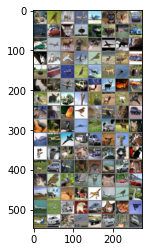

cat   bird  deer  plane plane cat   cat   car   deer  car   cat   bird  bird  deer  deer  car   car   plane deer  bird  cat   plane deer  cat   cat   cat   plane plane bird  deer  bird  car   bird  car   plane bird  plane deer  plane cat   cat   deer  plane car   deer  deer  car   plane bird  deer  car   bird  bird  deer  deer  plane cat   cat   bird  bird  cat   plane cat   car   bird  deer  bird  plane deer  car   deer  cat   plane plane plane car   car   deer  bird  deer  cat   bird  deer  cat   car   plane bird  cat   deer  car   plane deer  cat   deer  car   cat   cat   bird  bird  deer  deer  cat   car   car   plane deer  deer  deer  plane plane bird  bird  plane bird  car   cat   car   cat   cat   plane plane car   deer  plane car   car   deer  car  


In [307]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataloaders['train_a_1'])
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Implement model

In [308]:
class BaseNeuralNetwork2(nn.Module):
    """
    Baseline network for the experiment
    """
    def __init__(self):
        super(BaseNeuralNetwork2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU()
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        
        self.layer6 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU()
        )

        self.layer7 = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )

        self.layer8 = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Flatten()      
        )

        self.fc = nn.Sequential(
            nn.Linear(8 * 8 * 8, 10),
            nn.ReLU()
        )


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.fc(out)
        return out

In [309]:
model = BaseNeuralNetwork2()

In [310]:
model

BaseNeuralNetwork2(
  (layer1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer6): Sequential(
    (0):

### Define loss, optimizer and LR

In [317]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

num_epochs = 3

### Train

In [318]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [319]:
def train_model(model, criterion, optimizer, scheduler, split_name, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in [f'train_{split_name}', f'val_{split_name}']:
            if phase == f'train_{split_name}':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                # inputs = inputs.to(device)
                # labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == f'train_{split_name}'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == f'train_{split_name}':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == f'train_{split_name}':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == f'val_{split_name}' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, best_acc

In [320]:
base_model = dict()
base_acc = dict()

# Base A

In [321]:
model_a1 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_a1.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3

In [322]:
base_model['a_1'], base_acc['a_1'] = train_model(model_a1, criterion, optimizer_ft, exp_lr_scheduler, 'a_1', num_epochs=num_epochs)

Epoch 0/2
----------
train_a_1 Loss: 1.3579 Acc: 0.4616
val_a_1 Loss: 1.0314 Acc: 0.5870

Epoch 1/2
----------
train_a_1 Loss: 0.9961 Acc: 0.5937
val_a_1 Loss: 0.9669 Acc: 0.6062

Epoch 2/2
----------
train_a_1 Loss: 0.9239 Acc: 0.6288
val_a_1 Loss: 0.8950 Acc: 0.6388

Training complete in 0m 48s
Best val Acc: 0.638800


In [323]:
model_a2 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_a2.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['a_2'], base_acc['a_2'] = train_model(model_a2, criterion, optimizer_ft, exp_lr_scheduler, 'a_2', num_epochs=num_epochs)


Epoch 0/2
----------
train_a_2 Loss: 1.3756 Acc: 0.4707
val_a_2 Loss: 1.0540 Acc: 0.5538

Epoch 1/2
----------
train_a_2 Loss: 0.9569 Acc: 0.6104
val_a_2 Loss: 0.9386 Acc: 0.6152

Epoch 2/2
----------
train_a_2 Loss: 0.8834 Acc: 0.6433
val_a_2 Loss: 0.8589 Acc: 0.6406

Training complete in 0m 47s
Best val Acc: 0.640600


In [324]:
model_a3 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_a3.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['a_3'], base_acc['a_3'] = train_model(model_a3, criterion, optimizer_ft, exp_lr_scheduler, 'a_3', num_epochs=num_epochs)


Epoch 0/2
----------
train_a_3 Loss: 1.3290 Acc: 0.4744
val_a_3 Loss: 1.0293 Acc: 0.5854

Epoch 1/2
----------
train_a_3 Loss: 0.9487 Acc: 0.6168
val_a_3 Loss: 0.8931 Acc: 0.6418

Epoch 2/2
----------
train_a_3 Loss: 0.8435 Acc: 0.6649
val_a_3 Loss: 0.8325 Acc: 0.6664

Training complete in 0m 49s
Best val Acc: 0.666400


In [325]:
model_a4 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_a4.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['a_4'], base_acc['a_4'] = train_model(model_a4, criterion, optimizer_ft, exp_lr_scheduler, 'a_4', num_epochs=num_epochs)


Epoch 0/2
----------
train_a_4 Loss: 1.4720 Acc: 0.4418
val_a_4 Loss: 0.9588 Acc: 0.6208

Epoch 1/2
----------
train_a_4 Loss: 0.8883 Acc: 0.6500
val_a_4 Loss: 0.8668 Acc: 0.6514

Epoch 2/2
----------
train_a_4 Loss: 0.7944 Acc: 0.6892
val_a_4 Loss: 0.7874 Acc: 0.6774

Training complete in 0m 48s
Best val Acc: 0.677400


In [326]:
model_a5 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_a5.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['a_5'], base_acc['a_5'] = train_model(model_a5, criterion, optimizer_ft, exp_lr_scheduler, 'a_5', num_epochs=num_epochs)


Epoch 0/2
----------
train_a_5 Loss: 1.4066 Acc: 0.4442
val_a_5 Loss: 1.0508 Acc: 0.5704

Epoch 1/2
----------
train_a_5 Loss: 0.9734 Acc: 0.5962
val_a_5 Loss: 0.8903 Acc: 0.6330

Epoch 2/2
----------
train_a_5 Loss: 0.8640 Acc: 0.6484
val_a_5 Loss: 0.8192 Acc: 0.6626

Training complete in 0m 48s
Best val Acc: 0.662600


# Base B

In [327]:
model_b1 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b1.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3

In [328]:
base_model['b_1'], base_acc['b_1'] = train_model(model_b1, criterion, optimizer_ft, exp_lr_scheduler, 'b_1', num_epochs=num_epochs)

Epoch 0/2
----------
train_b_1 Loss: 1.4141 Acc: 0.4560
val_b_1 Loss: 0.9994 Acc: 0.6168

Epoch 1/2
----------
train_b_1 Loss: 0.8424 Acc: 0.6830
val_b_1 Loss: 0.7513 Acc: 0.7156

Epoch 2/2
----------
train_b_1 Loss: 0.6826 Acc: 0.7456
val_b_1 Loss: 0.6930 Acc: 0.7340

Training complete in 0m 48s
Best val Acc: 0.734000


In [329]:
model_b2 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b2.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['b_2'], base_acc['b_2'] = train_model(model_b2, criterion, optimizer_ft, exp_lr_scheduler, 'b_2', num_epochs=num_epochs)


Epoch 0/2
----------
train_b_2 Loss: 1.4025 Acc: 0.4316
val_b_2 Loss: 1.0753 Acc: 0.5278

Epoch 1/2
----------
train_b_2 Loss: 0.9917 Acc: 0.5694
val_b_2 Loss: 0.9431 Acc: 0.5938

Epoch 2/2
----------
train_b_2 Loss: 0.9002 Acc: 0.6176
val_b_2 Loss: 0.8747 Acc: 0.6282

Training complete in 0m 50s
Best val Acc: 0.628200


In [330]:
model_b3 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b3.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['b_3'], base_acc['b_3'] = train_model(model_b3, criterion, optimizer_ft, exp_lr_scheduler, 'b_3', num_epochs=num_epochs)


Epoch 0/2
----------
train_b_3 Loss: 1.5620 Acc: 0.3804
val_b_3 Loss: 1.2670 Acc: 0.4820

Epoch 1/2
----------
train_b_3 Loss: 1.2152 Acc: 0.5070
val_b_3 Loss: 1.1627 Acc: 0.5306

Epoch 2/2
----------
train_b_3 Loss: 1.1220 Acc: 0.5481
val_b_3 Loss: 1.1001 Acc: 0.5550

Training complete in 0m 48s
Best val Acc: 0.555000


In [331]:
model_b4 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b4.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['b_4'], base_acc['b_4'] = train_model(model_b4, criterion, optimizer_ft, exp_lr_scheduler, 'b_4', num_epochs=num_epochs)


Epoch 0/2
----------
train_b_4 Loss: 1.4245 Acc: 0.4485
val_b_4 Loss: 1.1345 Acc: 0.5492

Epoch 1/2
----------
train_b_4 Loss: 1.0193 Acc: 0.5928
val_b_4 Loss: 0.9730 Acc: 0.6188

Epoch 2/2
----------
train_b_4 Loss: 0.9261 Acc: 0.6360
val_b_4 Loss: 0.8978 Acc: 0.6504

Training complete in 0m 49s
Best val Acc: 0.650400


In [332]:
model_b5 = BaseNeuralNetwork2()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b5.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
num_epochs = 3
base_model['b_5'], base_acc['b_5'] = train_model(model_b5, criterion, optimizer_ft, exp_lr_scheduler, 'b_5', num_epochs=num_epochs)


Epoch 0/2
----------
train_b_5 Loss: 1.4246 Acc: 0.4481
val_b_5 Loss: 1.0421 Acc: 0.5616

Epoch 1/2
----------
train_b_5 Loss: 0.9851 Acc: 0.5968
val_b_5 Loss: 0.9260 Acc: 0.6240

Epoch 2/2
----------
train_b_5 Loss: 0.9012 Acc: 0.6337
val_b_5 Loss: 0.8683 Acc: 0.6496

Training complete in 0m 50s
Best val Acc: 0.649600


### Freeze N first layers and train others

In [512]:
for name, child in modelA.named_children():
    print(name)

layer1
layer2
layer3
layer4
layer5
layer6
layer7
layer8
fc


In [541]:
from collections import OrderedDict

modelA = copy.deepcopy(base_model['a_1'])
transfer_layers = ['layer1']
freeze_ind = 1

def transfer_learning(modelA, transfer_layers, freeze_ind):
    
    modelB = BaseNeuralNetwork2()

    pretrained_dict = modelA.state_dict()
    newmodel_dict = modelB.state_dict()

    new_state_dict = dict()

    for (k_pre, v_pre), (k_new, v_new) in zip(pretrained_dict.items(), newmodel_dict.items()):
        layer_name = k_pre.split('.')[0]
        if layer_name in transfer_layers:
            new_state_dict[k_pre] = v_pre
        else:
            new_state_dict[k_new] = v_new

    new_state_dict = OrderedDict(new_state_dict)

    modelB.load_state_dict(new_state_dict)
    
    if freeze_ind == 1:
        for name, child in modelB.named_children():
            if name in transfer_layers:
                for param in child.parameters():
                    param.requires_grad = False
    
    return modelB

In [542]:
results = pd.DataFrame(columns=['base_model', 'freeze_ind', 'transfer_layer', 'accuracy'])

In [550]:
transfer_layers = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6', 'layer7', 'layer8']
base_models = ['a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'b_1', 'b_2', 'b_3', 'b_4', 'b_5']
ind = 0
models = dict()

for base in base_models:
    modelA = copy.deepcopy(base_model[base])
    for freeze_ind in [0,1]:
        for layer_num in range(1, len(transfer_layers)+1):

            modelB = transfer_learning(modelA, transfer_layers[:layer_num], freeze_ind)

            criterion = nn.CrossEntropyLoss()
            optimizer_ft = optim.SGD(modelB.parameters(), lr=0.001, momentum=0.9)
            exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

            if base in ['a_1', 'b_1']:
                models[base+'_layer_'+str(layer_num)], acc = train_model(modelB, criterion, optimizer_ft, exp_lr_scheduler, 'b_1', num_epochs=3)
            elif base in ['a_2', 'b_2']:
                models[base+'_layer_'+str(layer_num)], acc = train_model(modelB, criterion, optimizer_ft, exp_lr_scheduler, 'b_2', num_epochs=3)
            elif base in ['a_3', 'b_3']:
                models[base+'_layer_'+str(layer_num)], acc = train_model(modelB, criterion, optimizer_ft, exp_lr_scheduler, 'b_3', num_epochs=3)
            elif base in ['a_4', 'b_4']:
                models[base+'_layer_'+str(layer_num)], acc = train_model(modelB, criterion, optimizer_ft, exp_lr_scheduler, 'b_4', num_epochs=3)
            else:
                models[base+'_layer_'+str(layer_num)], acc = train_model(modelB, criterion, optimizer_ft, exp_lr_scheduler, 'b_5', num_epochs=3)
            
            curr_results_list = [[base, freeze_ind, layer_num, float(acc)]]
            curr_results = pd.DataFrame(curr_results_list, columns = ['base_model', 'freeze_ind', 'transfer_layer', 'accuracy'])
            results = results.append(curr_results)

Epoch 0/2
----------
train_b_1 Loss: 1.2701 Acc: 0.5345
val_b_1 Loss: 0.8831 Acc: 0.6668

Epoch 1/2
----------
train_b_1 Loss: 0.8116 Acc: 0.6892
val_b_1 Loss: 0.7897 Acc: 0.6982

Epoch 2/2
----------
train_b_1 Loss: 0.7036 Acc: 0.7357
val_b_1 Loss: 0.6547 Acc: 0.7586

Training complete in 0m 53s
Best val Acc: 0.758600
Epoch 0/2
----------
train_b_1 Loss: 1.2969 Acc: 0.5114
val_b_1 Loss: 0.8677 Acc: 0.6664

Epoch 1/2
----------
train_b_1 Loss: 0.7870 Acc: 0.7028
val_b_1 Loss: 0.7175 Acc: 0.7244

Epoch 2/2
----------
train_b_1 Loss: 0.6731 Acc: 0.7440
val_b_1 Loss: 0.6492 Acc: 0.7542

Training complete in 0m 54s
Best val Acc: 0.754200
Epoch 0/2
----------
train_b_1 Loss: 1.3174 Acc: 0.5126
val_b_1 Loss: 0.9032 Acc: 0.6506

Epoch 1/2
----------
train_b_1 Loss: 0.8142 Acc: 0.6940
val_b_1 Loss: 0.7553 Acc: 0.7108

Epoch 2/2
----------
train_b_1 Loss: 0.7108 Acc: 0.7345
val_b_1 Loss: 0.6713 Acc: 0.7504

Training complete in 0m 52s
Best val Acc: 0.750400
Epoch 0/2
----------
train_b_1 Loss: 

In [571]:
results_copy = results

In [572]:
for k, v in base_acc.items():
    curr_base_results_list = [[k, 0, 0, float(v)]]
    curr_base_results = pd.DataFrame(curr_base_results_list, columns = ['base_model', 'freeze_ind', 'transfer_layer', 'accuracy'])
    results_copy = results_copy.append(curr_base_results)

In [573]:
results_copy

,base_model,freeze_ind,transfer_layer,accuracy
0,a_1,0,1,0.7498
0,a_1,0,2,0.7258
0,a_1,0,1,0.7586
0,a_1,0,2,0.7542
0,a_1,0,3,0.7504
...,...,...,...,...
0,b_1,0,0,0.7340
0,b_2,0,0,0.6282
0,b_3,0,0,0.5550
0,b_4,0,0,0.6504


In [574]:
r = results_copy.reset_index().drop('index', axis=1)

In [599]:
temp = pd.DataFrame(r['base_model'].str.split('_'))
temp[['base_model_group','base_model_spec']] = pd.DataFrame(temp.base_model.tolist(), index= temp.index)

In [602]:
base_model_group = temp['base_model_group']

In [603]:
r['base_model_group'] = base_model_group

In [607]:
r

,base_model,freeze_ind,transfer_layer,accuracy,base_model_group
0,a_1,0,1,0.7498,a
1,a_1,0,2,0.7258,a
2,a_1,0,1,0.7586,a
3,a_1,0,2,0.7542,a
4,a_1,0,3,0.7504,a
...,...,...,...,...,...
167,b_1,0,0,0.7340,b
168,b_2,0,0,0.6282,b
169,b_3,0,0,0.5550,b
170,b_4,0,0,0.6504,b


In [555]:
import seaborn as sns

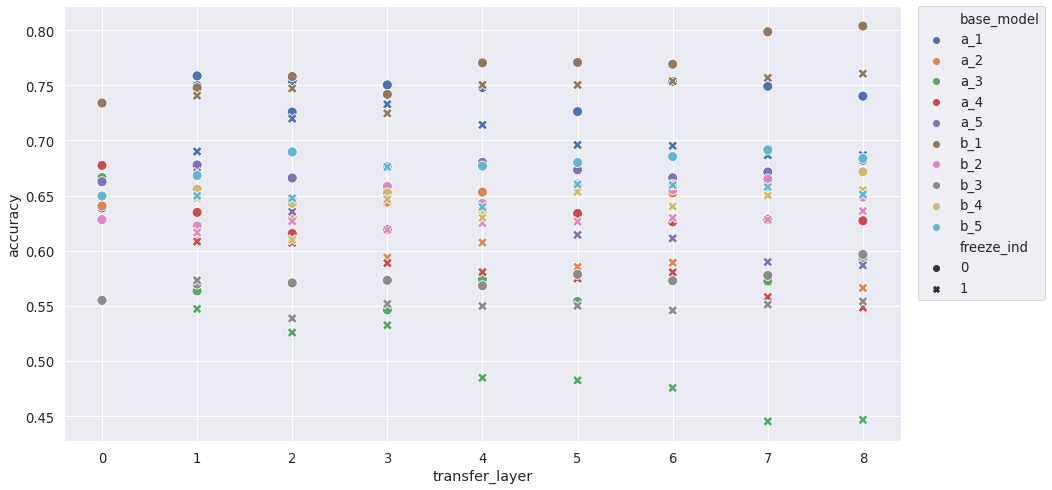

In [610]:
sns.set(rc={"figure.figsize":(15, 8)}, font_scale = 1.2) #width=3, #height=4
sns.scatterplot(data=r, x='transfer_layer', y='accuracy', hue='base_model', style='freeze_ind', s=100)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

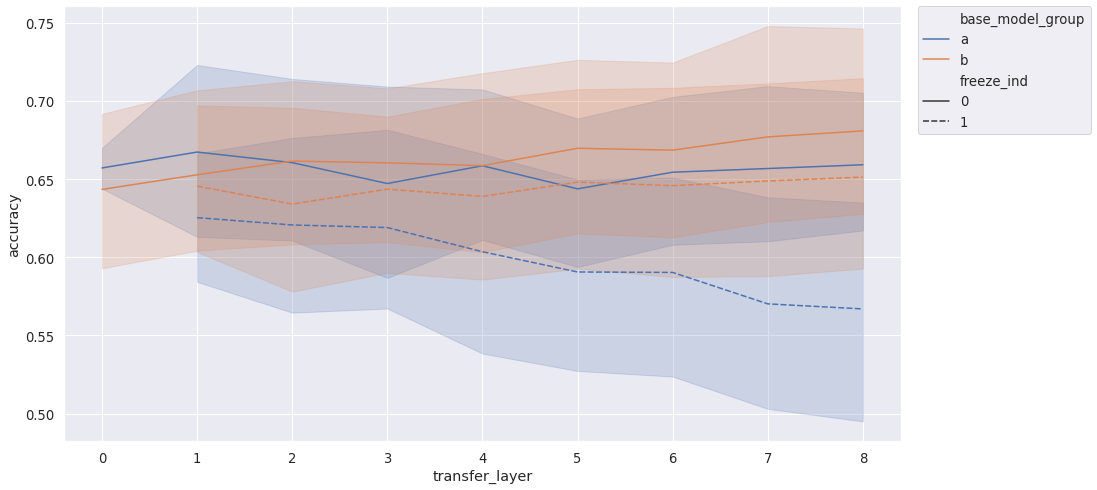

In [606]:
sns.set(rc={"figure.figsize":(15, 8)}, font_scale = 1.2) #width=3, #height=4
sns.lineplot(data=r, x='transfer_layer', y='accuracy', hue='base_model_group', style='freeze_ind')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

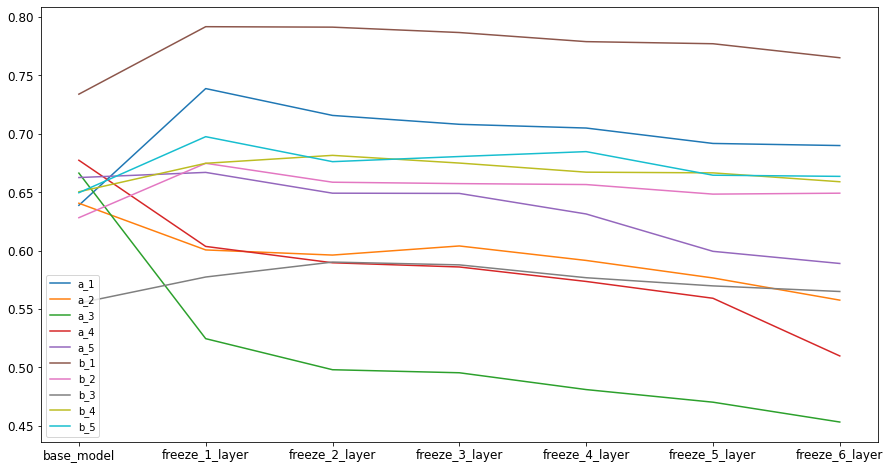

In [432]:
df.T.plot(figsize=(15,8), fontsize=12)
plt.show()